In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''
1. 在舊特徵下，資料量增大，對預測結果有啥影響?
2. 加入新特徵又會如何? 效率會改變嗎?
'''

'''讀取大資料'''
features=pd.read_csv(r"C:\Users\user\PycharmProjects\MachineLearnig\temps_extended.csv")
print(features.head(5))

'''查看資料數量'''
print()
print('資料規模:',features.shape)
print('原先的資料只有 348 筆，而新資料有 2191')

   year  month  day weekday  ws_1  prcp_1  snwd_1  temp_2  temp_1  average  \
0  2011      1    1     Sat  4.92    0.00       0      36      37     45.6   
1  2011      1    2     Sun  5.37    0.00       0      37      40     45.7   
2  2011      1    3     Mon  6.26    0.00       0      40      39     45.8   
3  2011      1    4    Tues  5.59    0.00       0      39      42     45.9   
4  2011      1    5     Wed  3.80    0.03       0      42      38     46.0   

   actual  friend  
0      40      40  
1      39      50  
2      42      42  
3      38      59  
4      45      39  

資料規模: (2191, 12)
原先的資料只有 348 筆，而新資料有 2191


In [55]:
'''
以上資料量變大，也新增了特徵:
ws_1: 前一天風速
prcp_1: 前一天降水
snwd_1: 前一天積雪深度
'''

'''日期整合'''
import datetime
years=features['year']
months=features['month']
days=features['day']

dates=[str(int(year))+'-'+str(int(month))+'-'+str(int(day)) for
       year,month,day in zip(years,months,days)]
dates=[datetime.datetime.strptime(date,'%Y-%m-%d') for date in dates]


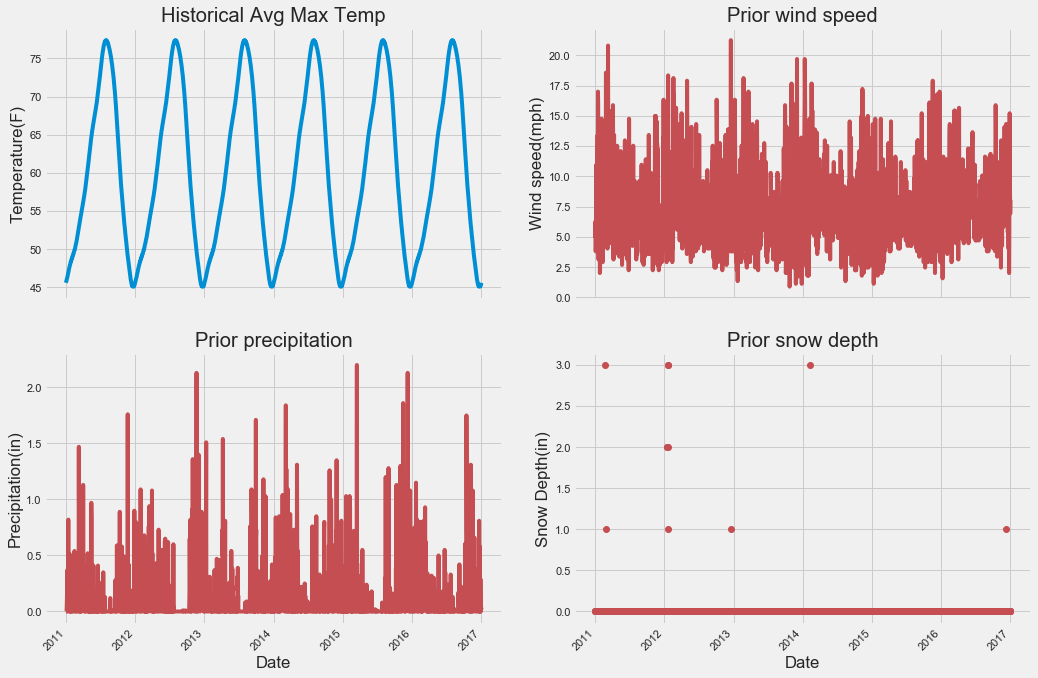

In [56]:
plt.style.use('fivethirtyeight')

'''設定版面配置'''
fig, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(15,10))
fig.autofmt_xdate(rotation=45)

'''平均最高氣溫'''
ax1.plot(dates,features['average'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature(F)')
ax1.set_title('Historical Avg Max Temp')

'''風速'''
ax2.plot(dates,features['ws_1'],'r-')
ax2.set_xlabel('')
ax2.set_ylabel('Wind speed(mph)')
ax2.set_title('Prior wind speed')

'''降水'''
ax3.plot(dates,features['prcp_1'],'r-')
ax3.set_xlabel('Date')
ax3.set_ylabel('Precipitation(in)')
ax3.set_title('Prior precipitation')

'''積雪'''
ax4.plot(dates,features['snwd_1'],'ro')
ax4.set_xlabel('Date')
ax4.set_ylabel('Snow Depth(in)')
ax4.set_title('Prior snow depth')

plt.tight_layout(pad=2)
plt.show()

In [57]:
'''發現天氣轉變跟季節有關，可以自己建立新特徵: 季節變數'''
seasons=[]
for month in features['month']:
    if month in [1,2,12]:
        seasons.append('winter')
    elif month in [3,4,5]:
        seasons.append('spring')
    elif month in [6,7,8]:
        seasons.append('summer')
    elif month in [9,10,11]:
        seasons.append('fall')
reduced_features=features[['temp_1','prcp_1','average','actual']]
reduced_features.insert(4,'season',seasons)


'''接下來就可以依季節去觀察各項特徵的變化'''
import  seaborn as sns
sns.set(style='ticks',color_codes=True)

'''選擇喜歡的顏色'''
palette=sns.xkcd_palette(['dark blue','dark green','gold','orange'])


'''繪製 pairplot 探討兩兩特徵之間的關係'''

'''
hue : 針對某一段文字進行分類，不同類別會有不同顏色

kind: 非對角線的圖類型，令為 'reg' 則會擬合出一條迴歸線

diag_kde: 對角線上的圖類型

palettte: 調色盤

x_vars : 以 list 傳入 x 軸的部分，只顯示輸入特徵的關係圖

y_vars : 同上，這是 y 軸部分的特徵

plot_kws: 控制非對角線上圖的樣式

diag_kws: 控制對角線上圖的樣式
'''

# sns.pairplot(reduced_features,hue='season',kind="reg",diag_kind='kde',palette=palette
#              ,plot_kws=dict(alpha=0.7),diag_kws=dict(shade=True))



"\nhue : 針對某一段文字進行分類，不同類別會有不同顏色\n\nkind: 非對角線的圖類型，令為 'reg' 則會擬合出一條迴歸線\n\ndiag_kde: 對角線上的圖類型\n\npalettte: 調色盤\n\nx_vars : 以 list 傳入 x 軸的部分，只顯示輸入特徵的關係圖\n\ny_vars : 同上，這是 y 軸部分的特徵\n\nplot_kws: 控制非對角線上圖的樣式\n\ndiag_kws: 控制對角線上圖的樣式\n"

In [58]:
# 對 weekday 做獨熱編碼
features=pd.get_dummies(features)
print(features)


      year  month  day   ws_1  prcp_1  snwd_1  temp_2  temp_1  average  \
0     2011      1    1   4.92    0.00       0      36      37     45.6   
1     2011      1    2   5.37    0.00       0      37      40     45.7   
2     2011      1    3   6.26    0.00       0      40      39     45.8   
3     2011      1    4   5.59    0.00       0      39      42     45.9   
4     2011      1    5   3.80    0.03       0      42      38     46.0   
...    ...    ...  ...    ...     ...     ...     ...     ...      ...   
2186  2016     12   28  15.21    0.05       0      42      44     45.3   
2187  2016     12   29   8.72    0.00       0      44      47     45.3   
2188  2016     12   30   8.50    0.05       0      47      48     45.4   
2189  2016     12   31   6.93    0.02       0      48      45     45.5   
2190  2017      1    1   8.05    0.03       0      45      38     45.6   

      actual  friend  weekday_Fri  weekday_Mon  weekday_Sat  weekday_Sun  \
0         40      40            0  

In [59]:
'''分離大資料的特徵和標籤'''
labels=features['actual']
features=features.drop('actual',axis=1)
features_list=list(features.columns)

'''換成 array'''
import numpy as np
features=np.array(features)
labels=np.array(labels)

'''大資料的訓練集、測試集'''
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split\
    (features,labels,test_size=0.25,random_state=0)

#先來看看舊特徵也就是剃除 'ws_1', 'prcp_1', 'snwd_1' 的結果

'''把舊特徵的 index 集中'''
orig_feature_index=[features_list.index(feature) for feature in features_list
                    if feature not in ['ws_1', 'prcp_1', 'snwd_1']]

#現在叫出資料量 348 筆的小資料
small_features=pd.read_csv(r'C:\Users\user\PycharmProjects\MachineLearnig\temps.csv')
small_features=pd.get_dummies(small_features)
print('小資料的規模:')
print(small_features.shape)
print()

'''小的特徵跟標籤分離'''
small_labels=np.array(small_features['actual'])
small_features=small_features.drop('actual',axis=1)
small_features_list=list(small_features.columns)
small_features=np.array(small_features)

'''小的訓練集、測試集'''
from sklearn.model_selection import train_test_split

small_features_train,small_features_test,small_labels_train,\
small_labels_test=train_test_split(small_features,small_labels,test_size=0.25,random_state=42)

'''用小資料去建樹模型'''
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=0)

'''小資料樹模型'''
rf.fit(small_features_train,small_labels_train)

'''統一用大資料測試集去做測試'''
small_model_pred=rf.predict(features_test[:,orig_feature_index])

'''計算平均溫度誤差'''
errors=abs(small_model_pred-labels_test)
print('小資料平均溫度誤差:',round(np.mean(errors),2),'degrees.')

'''MAPE'''
mape=100*(errors/labels_test)

# 為了觀察方便，用 100-誤差
accuracy=100-np.mean(mape)
print('small_Accuracy:',round(accuracy,2),'%.')

小資料的規模:
(348, 15)

小資料平均溫度誤差: 4.67 degrees.
small_Accuracy: 92.2 %.


In [60]:
#現在用大資料建模，再跟小資料樹模型的結果做比較

'''同樣用舊特徵去建模'''
features_train1=features_train[:,orig_feature_index]
big_rf=RandomForestRegressor(n_estimators=100,random_state=0)

'''大資料樹模型'''
big_rf.fit(features_train1,labels_train)

'''用大資料樹模型去預測，記得大資料測試集也要去除新特徵'''
features_test1=features_test[:,orig_feature_index]
big_pred=big_rf.predict(features_test1)

'''大資料的平均溫度誤差'''
big_errors=abs(big_pred-labels_test)
print('大資料平均溫度誤差:',round(np.mean(big_errors),2),'degrees.')

'''MAPE'''
big_mape=100*np.mean(big_errors/labels_test)
big_accuracy=100-big_mape
print('big_Accuracy:',round(big_accuracy,2),'%.')
print('誤差下降為 4.2')
print('一般機器學習都希望資料量越大越好，可讓學習更充分且降低過擬合')

大資料平均溫度誤差: 4.2 degrees.
big_Accuracy: 93.12 %.
誤差下降為 4.2
一般機器學習都希望資料量越大越好，可讓學習更充分且降低過擬合


In [61]:
 '''增加特徵個數對結果的影響'''
from sklearn.ensemble import RandomForestRegressor
rf_exp=RandomForestRegressor(n_estimators=100,random_state=0)
rf_exp.fit(features_train,labels_train)

'''預測'''
exp_pred=rf_exp.predict(features_test)

'''有新特徵的平均溫度誤差'''
exp_errors=abs(exp_pred-labels_test)
print()
print('新特徵平均溫度誤差:',round(np.mean(exp_errors),2),'degrees.')

'''MAPE'''
exp_mape=100*np.mean(exp_errors/labels_test)
exp_accuracy=100-exp_mape
print('exp_Accuracy:',round(exp_accuracy,2),'%.')

print()
print('整體還是有提升的!')



新特徵平均溫度誤差: 4.05 degrees.
exp_Accuracy: 93.35 %.

整體還是有提升的!


展示特徵重要性
特徵:temp_1               重要度:0.85
特徵:average              重要度:0.05
特徵:ws_1                 重要度:0.02
特徵:friend               重要度:0.02
特徵:year                 重要度:0.01
特徵:month                重要度:0.01
特徵:day                  重要度:0.01
特徵:prcp_1               重要度:0.01
特徵:temp_2               重要度:0.01
特徵:snwd_1               重要度:0.0
特徵:weekday_Fri          重要度:0.0
特徵:weekday_Mon          重要度:0.0
特徵:weekday_Sat          重要度:0.0
特徵:weekday_Sun          重要度:0.0
特徵:weekday_Thurs        重要度:0.0
特徵:weekday_Tues         重要度:0.0
特徵:weekday_Wed          重要度:0.0

仍然是 temp_1、average 排在最前面，新特徵只有風速 ws_1 出現，但影響力小


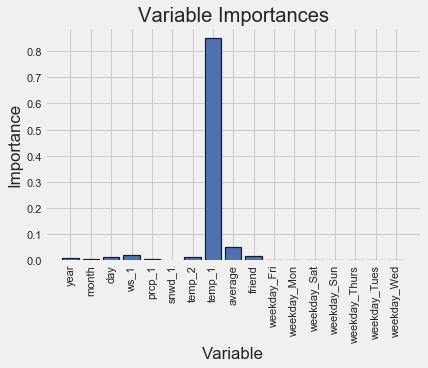

In [64]:
print('展示特徵重要性')

'''有網格的背景'''
plt.style.use('fivethirtyeight')

'''特徵名'''
importances=list(rf_exp.feature_importances_)

'''名字、重要度組合'''
features_important=[(feature,round(importance,2)) for feature,importance
                    in zip(features_list,importances)]

'''排序'''
features_important=sorted(features_important,key=lambda x:x[1],reverse=True)
                          # 比較 key 的數值大小來排序

'''列印結果'''
[print('特徵:{:20} 重要度:{}'.format(*pair)) for pair in features_important]
print()
print('仍然是 temp_1、average 排在最前面，新特徵只有風速 ws_1 出現，但影響力小')

'''圖表化'''

'''指定位置'''
x_values=list(range(len(importances)))

'''畫圖'''
plt.bar(x_values,importances,orientation='vertical',color='b',
        edgecolor='k',linewidth=1.2)

'''x軸的名字豎著寫'''
plt.xticks(x_values,features_list,rotation='vertical')

'''圖名'''
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

plt.show()


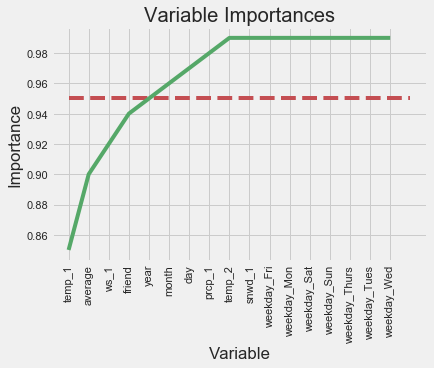

由圖可以看到，重要特徵只到 year，再往右都用不到


In [67]:
'''
將重要度從大到小排列。
設定一個門檻值:95%，讓特徵重要度以累加的方式達到，而達到的那些特徵就是主要特徵，其餘丟棄。
'''

'''把排序後的特徵跟重要度獨立出來'''
sorted_importances=[importance[1] for importance in features_important]
sorted_features=[importance[0] for importance in features_important]

'''累加'''
cumulative_importances=np.cumsum(sorted_importances)

'''繪製聚合線圖'''
plt.plot(x_values,cumulative_importances,'g-')

'''畫一條 y=0.95 的紅色虛線'''
plt.hlines(y=0.95,xmin=0,xmax=len(sorted_importances),colors='r',linestyles='dashed')

'''x軸標名字'''
plt.xticks(x_values,sorted_features,rotation='vertical')

'''y軸、圖名'''
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

plt.show()
print('由圖可以看到，重要特徵只到 year，再往右都用不到')

In [74]:
'''實驗: 如果只用這 5 個特徵去建模，結果如何?'''

'''5個重要特徵名'''
impt_name=[feature[0] for feature in features_important[0:5]]

'''找出它們在原資料的index'''
impt_index=[features_list.index(feature) for feature in impt_name]

'''為了做比較，所以從原訓練集、測試集拿出新集合'''
impt_train=features_train[:,impt_index]
impt_test=features_test[:,impt_index]

'''訓練模型'''
rf_impt=RandomForestRegressor(n_estimators=100,random_state=0)
rf_impt.fit(impt_train,labels_train)

'''預測'''
impt_pred=rf_impt.predict(impt_test)

'''重要特徵的平均溫度誤差'''
impt_errors=abs(impt_pred-labels_test)
print()
print('重要特徵平均溫度誤差:',round(np.mean(impt_errors),2),'degrees.')

'''MAPE'''
impt_mape=100*np.mean(impt_errors/labels_test)
impt_accuracy=100-impt_mape
print('impt_Accuracy:',round(impt_accuracy,2),'%.')
print()
print('結果沒有比較好，代表說其餘特徵還是有一定作用的!')


重要特徵平均溫度誤差: 4.11 degrees.
impt_Accuracy: 93.28 %.

結果沒有比較好，代表說其餘特徵還是有一定作用的!


In [71]:
print('雖然效果沒有較好，但是說不定效率上可以更省時間?')

'''計算時間'''
import time
all_features_time=[]

'''取大資料計算十次，然後算效率總平均'''
for _ in range(10):
    start_time=time.time()
    rf_exp.fit(features_train,labels_train)
    all_features_pred=rf_exp.predict(features_test)
    end_time=time.time()
    all_features_time.append(end_time-start_time)
              # 將每次消耗的時間儲存
all_features_time=np.mean(all_features_time)
              # 十次耗時的平均
print()
print('使用所有特徵建模與測試的平均消耗時間:',round(all_features_time,2),'秒')

'''取重要特徵的資料效率'''
rd_features_time=[]
for _ in range(10):
    start_time=time.time()
    rf_exp.fit(impt_train,labels_train)
    rd_pred=rf_exp.predict(impt_test)
    end_time=time.time()
    rd_features_time.append(end_time-start_time)
rd_features_time=np.mean(rd_features_time)
print('使用重要特徵建模與測試的平均消耗時間:',round(rd_features_time,2),'秒')

雖然效果沒有較好，但是說不定效率上可以更省時間?

使用所有特徵建模與測試的平均消耗時間: 0.68 秒
使用重要特徵建模與測試的平均消耗時間: 0.42 秒
